In [197]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab

In [198]:
data = pd.read_csv('bank.csv', sep = ',')
data.dropna()
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [199]:
X = data[['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y = data[['age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

x=[]
for i in range(len(y_test)):
    x.append(i)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [200]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  9.773941093456006
Mean squared error =  144.22495053994476


In [201]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  25.07491168576701


In [202]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[ 4.09535182e-04  6.25021839e-03  4.74713253e-05 -0.00000000e+00
 -1.56071805e-04 -0.00000000e+00]


In [203]:
y_pred_lasso = clf.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)

Mean absolute error with lasso =  9.773172900606667
Mean squared error with lasso =  144.22109656176238


Text(0, 0.5, 'Возраст клиента')

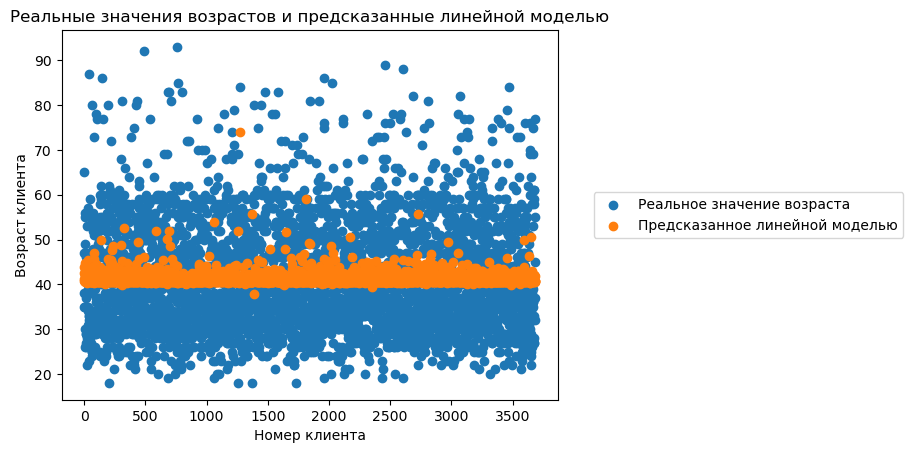

In [204]:
plt.scatter(x, y_test, label = u'Реальное значение возраста')
plt.scatter(x, y_pred, label = u'Предсказанное линейной моделью')
plt.title(u'Реальные значения возрастов и предсказанные линейной моделью')
plt.legend(loc='center right', borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Номер клиента')
plt.ylabel(u'Возраст клиента')

C:\Users\timep\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

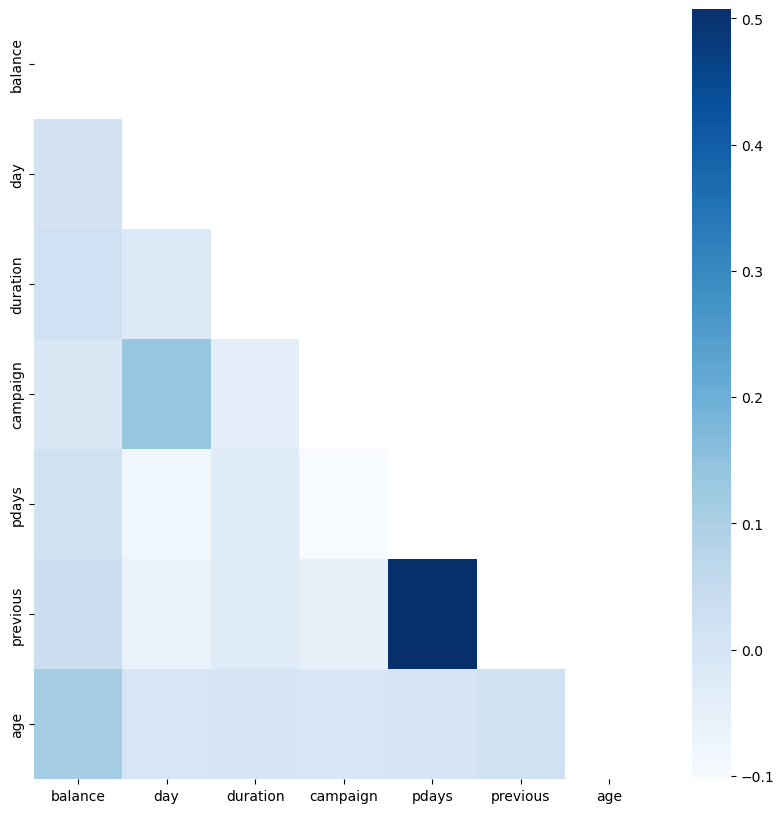

In [205]:
dataset = data[['balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'age']]
corr = dataset.corr()
mask = np.zeros_like(corr, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

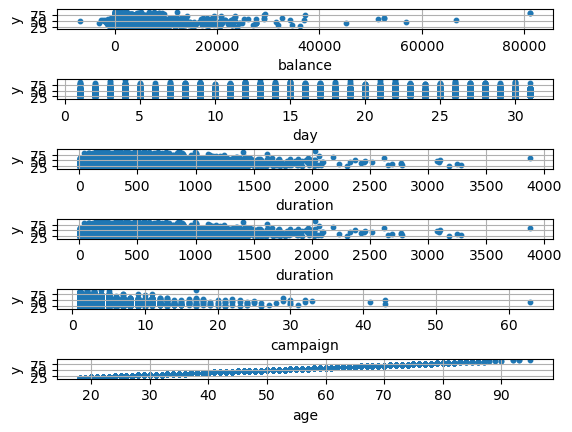

In [206]:
X = data[['balance', 'day', 'duration', 'previous', 'campaign', 'age']]
fig, axs = plt.subplots(6, 1)
plt.subplots_adjust(wspace=0, hspace=2.5)
axs[0].scatter(X[['balance']], y, s=10)
axs[0].set_xlabel('balance')
axs[0].set_ylabel('y')
axs[0].grid(True)

axs[1].scatter(X[['day']], y, s=10)
axs[1].set_xlabel('day')
axs[1].set_ylabel('y')
axs[1].grid(True)

axs[2].scatter(X[['duration']], y, s=10)
axs[2].set_xlabel('duration')
axs[2].set_ylabel('y')
axs[2].grid(True)

axs[3].scatter(X[['duration']], y, s=10)
axs[3].set_xlabel('duration')
axs[3].set_ylabel('y')
axs[3].grid(True)

axs[4].scatter(X[['campaign']], y, s=10)
axs[4].set_xlabel('campaign')
axs[4].set_ylabel('y')
axs[4].grid(True)

axs[5].scatter(X[['age']], y, s=10)
axs[5].set_xlabel('age')
axs[5].set_ylabel('y')
axs[5].grid(True)

In [207]:
X = data[['balance', 'duration', 'previous']]
scaler = StandardScaler()
y = data[['pdays']]
X = pd.DataFrame(scaler.fit_transform(X))
X.columms = ['balance', 'duration', 'previous']
scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y))
y.columns = ['pdays']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_all = np.array(reg.predict(X))

C:\Users\timep\AppData\Local\Temp\ipykernel_14500\4040672420.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.columms = ['balance', 'duration', 'previous']


In [208]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute error =  0.5293072722335417
Mean squared error =  0.7746950231264431
Mean absolute percentage error =  71.94492947970615


Text(0, 0.5, 'Предсказанные значения')

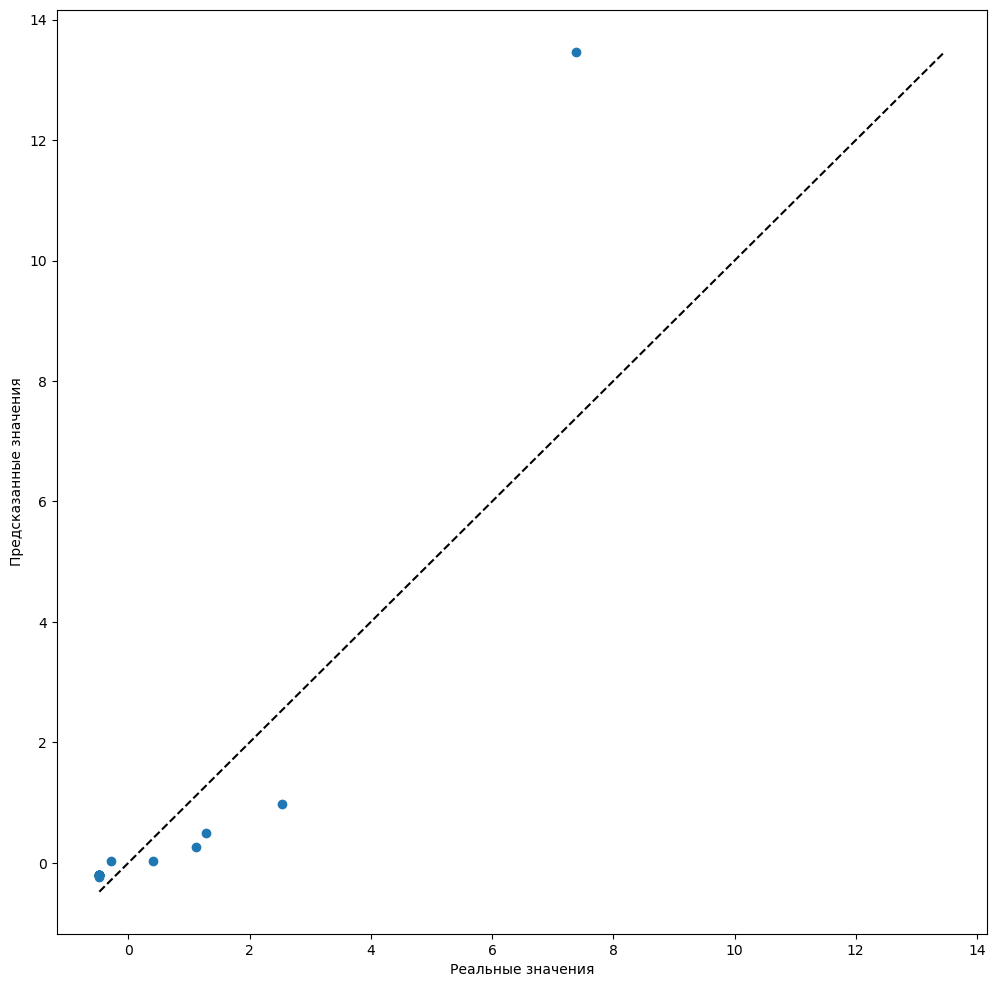

In [209]:
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y, percs)
qn_second = np.percentile(y_pred_all, percs)
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls='', marker='o', markersize=6)
plt.plot(x, x, color='k', ls='--')

plt.xlabel(u'Реальные значения')
plt.ylabel(u'Предсказанные значения')

Text(0, 0.5, 'pdays')

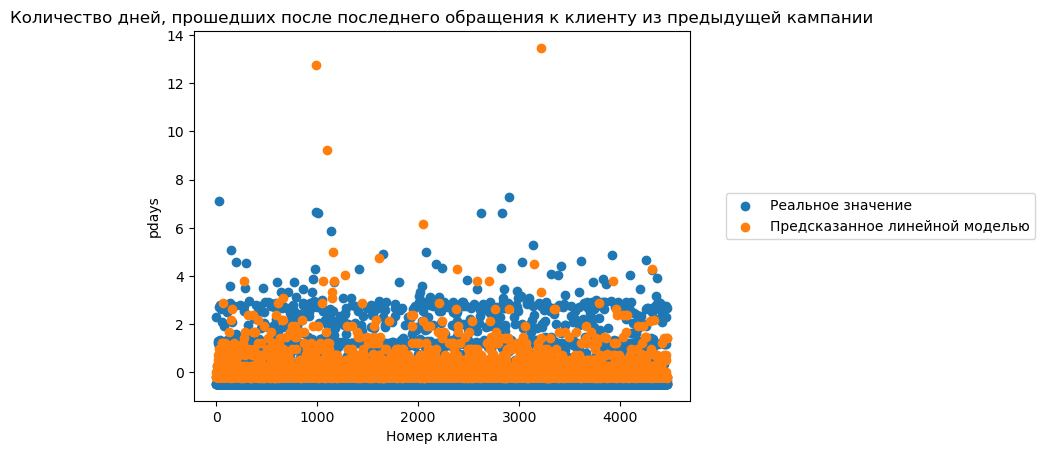

In [210]:
 x = []

for i in range(len(y_test)):
    x.append(i)

plt.scatter(x, y_test, label = u'Реальное значение')
plt.scatter(x, y_pred, label = u'Предсказанное линейной моделью')
plt.title(u'Количество дней, прошедших после последнего обращения к клиенту из предыдущей кампании')
plt.legend(loc='center right', borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Номер клиента')
plt.ylabel(u'pdays')

In [211]:
poly = PolynomialFeatures(2)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(2)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression()
reg.fit(X_train_new, y_train)
y_pred_poly = reg.predict(X_test_new)
X_new = poly.fit_transform(X)
y_pred_poly_all = reg.predict(X_new)

Text(0, 0.5, 'Предсказанные значения')

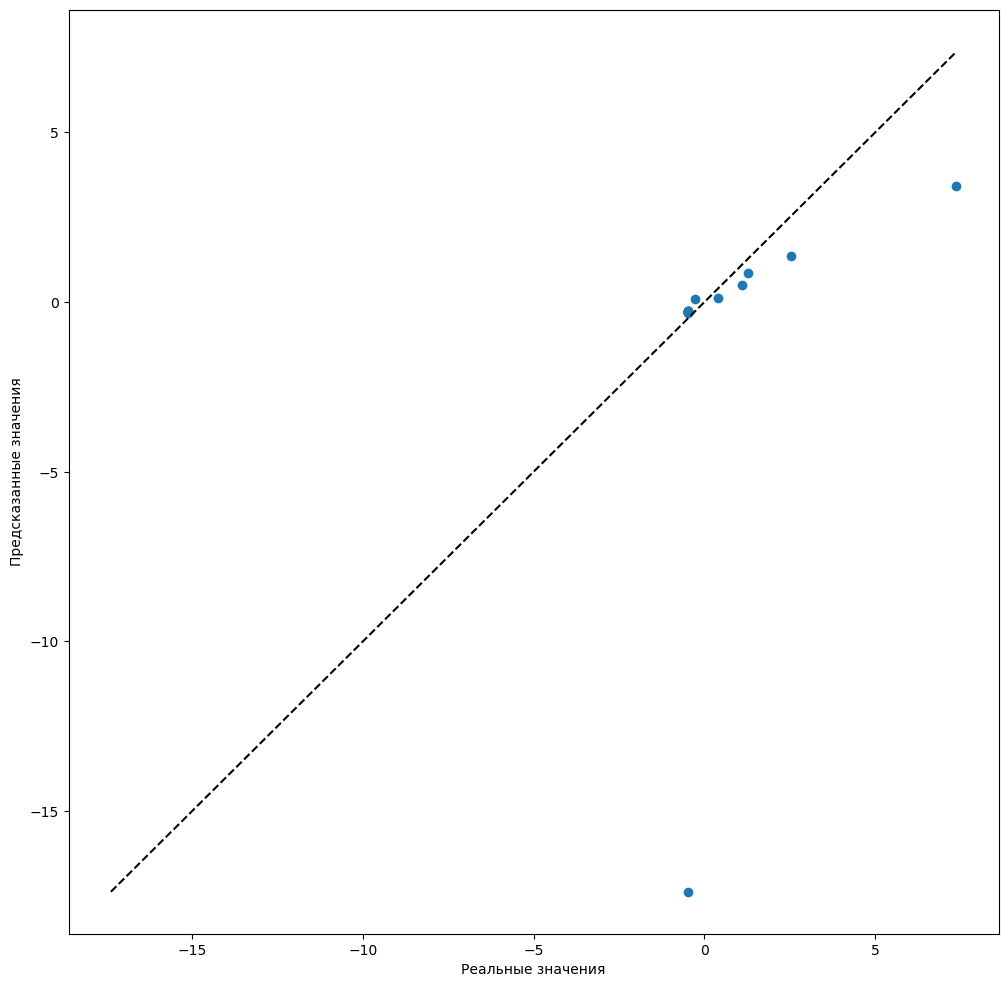

In [212]:
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y, percs)
qn_second = np.percentile(y_pred_poly_all, percs)
plt.figure(figsize=(12,12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls='', marker='o', markersize=6)
plt.plot(x, x, color='k', ls='--')

plt.xlabel(u'Реальные значения')
plt.ylabel(u'Предсказанные значения')

In [213]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print('Mean absolute error with Polynomial model = ', mae_poly)
print('Mean squared error with Polynomial model = ', mse_poly)

Mean absolute error with Polynomial model =  0.4571134396682687
Mean squared error with Polynomial model =  0.8259209715215364


Text(0, 0.5, 'pdays')

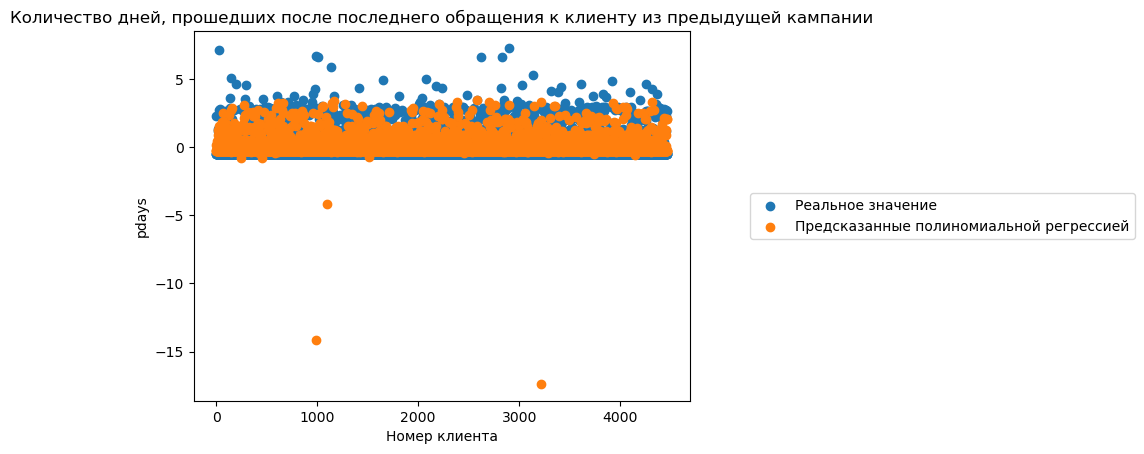

In [214]:
x=[]

for i in range(len(y_test)):
    x.append(i)
plt.scatter(x, y_test, label = u'Реальное значение')
plt.scatter(x, y_pred_poly, label = u'Предсказанные полиномиальной регрессией')
plt.title(u'Количество дней, прошедших после последнего обращения к клиенту из предыдущей кампании')
plt.legend(loc='center right', borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel(u'Номер клиента')
plt.ylabel('pdays')

C:\Users\timep\AppData\Local\Temp\ipykernel_14500\1038916821.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_diff, kde=False)


<Axes: >

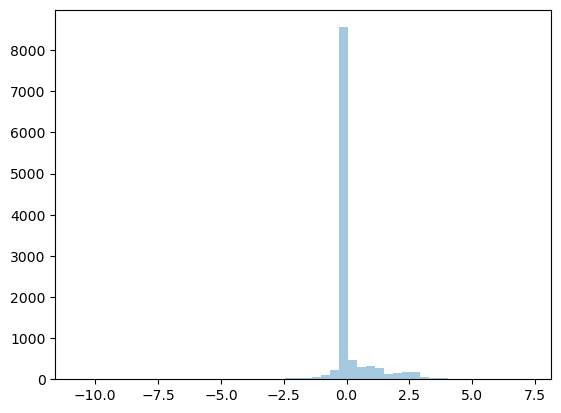

In [215]:
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1[:,0] - y2[:,0]
sns.distplot(y_diff, kde=False)